**Student Name:** Adam Abid, Devin Duran 

**Assignment Title:** Final Project - Persuasive Analysis - Predicting Titanic Survivors





   ### <mark> Predicting Titanic Survivors </mark>

# <mark> Getting Started: </mark>
- First we will import  the necessary libraries
- The libraries we will use to help us in making our model with the prediction tools coming from sklearn
- We will also use the pandas library to clean our data for descriptive statistics.
- In this specific example we are using the regression model of random forest.



<mark>__Background__<br></mark>
The dataset https://github.com/datasciencedojo/datasets/blob/master/titanic.csv contains all of the information about the passengers on the Titanic. It contains their names, age, sex, fare price, and most importantly whether they survived or not. We will be using this data to create a model in order to predict titanic survivors as well as answering questions about whether there is a pattern on who survived vs. who didn't or was it all just random.

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
pd.options.mode.chained_assignment = None


### <mark> Loading the Data </mark>

- Here we will load in the data and run data.head() to pring the first 5 indexes and confirm the data was read in successfully.

In [2]:
data = pd.read_csv("titanic.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### <mark> About the data </mark>

- To learn more about the type of data that is in our dataset we have used the data.info() function. 

- It shows us that they are 891 observatons with 12 categories 
- The data types included are floats (2), ints (5), objects (5)
- Below is the **key** for the unintuitve categories in the data frames


    - passengerId = number id represnting passenger
    - survived    = 1 for survived and 0 for death
    - P class     = The ticket class of the passenger
    - Sib/Sp      = The number of siblings/ spouses along with them if any
    - parch       = The number of parents aboard with the passenger if any
    - embarked    = Port where the passenger had originally embarked

- With the describe function we can calculate key statistics in helping us
- understand the data set more and see if they are any obvious factors when predicting survivors.

- Some important states are that out of all the passengers only **38%** of the pessengers survived. Additonally, the average age of the passengers were 29 meaning that the passenger class was quite young.



In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## <mark> Cleaning Data Frame: </mark>

- We will start out by creating a new data frame with the columns that are necessary 
- We will then use the **Label Encoder** to turn all of sex string data into numerical data as we would like that to be a factor in our prediction.


- We will also use a for loop to change all the numeric data types into float types 
- We will also remove all NA entries from the data frame


In [5]:
new_data = data[['PassengerId', 'Survived', 'Age', 'Fare','Pclass','Sex']]

le = LabelEncoder()
new_data['Sex'] = le.fit_transform(new_data['Sex'])

new_data = new_data.dropna()


for k in new_data:
    if new_data[k].dtypes == "int64":
        new_data[k] = new_data[k].astype(float)
        
        
new_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    float64
 1   Survived     714 non-null    float64
 2   Age          714 non-null    float64
 3   Fare         714 non-null    float64
 4   Pclass       714 non-null    float64
 5   Sex          714 non-null    float64
dtypes: float64(6)
memory usage: 39.0 KB


- We can now see with the info() funciton that we have successfully changed the datatype to all floats for continuity and have created a new data frame with the factors that will help us predict which passengers will survive and which will not.

In [6]:
new_data.head()

,PassengerId,Survived,Age,Fare,Pclass,Sex
0,1.0,0.0,22.0,7.2500,3.0,1.0
1,2.0,1.0,38.0,71.2833,1.0,0.0
2,3.0,1.0,26.0,7.9250,3.0,0.0
3,4.0,1.0,35.0,53.1000,1.0,0.0
4,5.0,0.0,35.0,8.0500,3.0,1.0


## <mark>Creating and Training our Model: </mark>

- After cleaning our data and making our data frame suitable for the random forest functions, we can now begin training and testing our model.


- Firstly we will create and seperate our independent and dependent variables. 

- In this context our independent variables is the thing we our trying to predict and the dependent variables are the variables we will use to create our prediction. 

- For this specific model we have chosen to predict whether a passenger on the Titanic will survive or not. 

- **We are not predicting an amount, we are predicting a yes or no** this means that we will be using the classification version of the Random Forest model and not the regression model.



- **We want to** first create an accurate prediction model but also see what factors are important in deeming whether a passenger will survive or not. 


### <mark> Defining our indepentdent and dependent variables </mark>

- our dependent variables are the factors that will affect/ help determine the independent variable. Our independent variable is the thing we want to predict. In this case we want to **predict whether or not a passenger will survive**. The factors we will use to determine that will be **Age, Fare, Pclass, and Sex**
 


In [7]:
x = new_data[['Age', 'Fare','Pclass','Sex']]
y = new_data[['Survived']]

- Now we are going to train our data using the **train_test_split** function


- For our model we will be using **30%** of the dataset to train the model and the remaining **70%** to test the model.


- For our intial test we will be using **10 estimators** and see what our accuracy looks like 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
h = RandomForestClassifier(n_estimators = 10, random_state = 5)


## <mark>Running our Model: </mark>

- We can now run the model with the **fit()** and testing it with the **predict()** funciton


- We can judge our model results with the **mean squared error** which tells us the average summation of the squared difference from the actual value and the predicted value.


- There is no correct **mse** value as it is a relative number to the data set however the lower the number the better and a mse of zero indicates a perfect model.




In [9]:
y_train = y_train.values.ravel()
h.fit(x_train,y_train)
y_pred = h.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7767441860465116

In [10]:


obs = [[14.0,300.0,1.0,1.0]]
h.predict(obs) 


/Users/adamabid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [11]:
obs = [[37.0,28.0,2.0,1.0]]
h.predict(obs) 


/Users/adamabid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.])

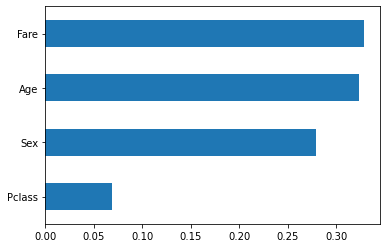

In [12]:
model_ranks=pd.Series(h.feature_importances_,index=x_train.columns,name="Importance").sort_values(ascending=True,inplace=False) 
ax=model_ranks.plot(kind='barh')

## <mark> Initial Results </mark>

- For our first prediction we wanted to know whether or not a 14 yr old female passenger who had paid 300 USD for their fare and was cabin class 1 would survive or not. **(they would)**

- For our first prediction we wanted to know whether or not a 37 yr old male passenger who had paid 28 USD for their fare and was cabin class 2 would survive or not. **(they would not)**

- Our model predicts that yes he will indeed survive 

- Our initial model has an accuracy score of .78 and accroding to the important factor visualization it deems that all of the dependent variables except for the cabin class is important in whether or not predicting whether a passenger will survive or not.

### <mark>Improving  our Model: </mark>

- The previous run will serve as our benchmark standard, we can now work on impoving the accuracy of our model.


- The first thing we want to do is impover the accuracy score. A way we can do this is increase the amount of estimators we have. With such a big time frame and multiple factors it would make sense to increase the amount of samples for the model to look at.

- We will change the number of estimators until we see a **diminish of returns**

- We have tested moving the number of estimators from 10 to 100 to 1000 with 100 being the point of diminishing returns with an accuracy of.80 and 1000 being .809

- So going forward we will choose our n estimators to be 100 as it is the highest accuracy we can acheive while also being highly efficient as increasing the number of estimators creates for a longer runtime



In [13]:
#model v2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
h = RandomForestClassifier(n_estimators = 100, random_state = 5)
y_train = y_train.values.ravel()
h.fit(x_train,y_train)
y_pred = h.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8

In [14]:
#model v3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
h = RandomForestClassifier(n_estimators = 1000, random_state = 5)
y_train = y_train.values.ravel()
h.fit(x_train,y_train)
y_pred = h.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8093023255813954

- Additionallly, it may seem that the best way to  **improve our model** is by dropping the cabin class column as the importance factor for that is much lower compared to the rest of the variables.

- **HOWEVER** doing so gives the model much less data to correlate and classify with. Giving it a drastically lower accuracy score(.74) compared to that of before. 

- So for our **continued predictions** we will not be using this model and will revert to our second version where the only change was the number of estimators.

In [15]:
x = new_data[['Age', 'Fare','Sex']]
y = new_data[['Survived']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
h = RandomForestClassifier(n_estimators = 1000, random_state = 5)
y_train = y_train.values.ravel()
h.fit(x_train,y_train)
y_pred = h.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7441860465116279

In [16]:
#reverting back to model v2
x = new_data[['Age', 'Fare','Pclass','Sex']]
y = new_data[['Survived']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
h = RandomForestClassifier(n_estimators = 100, random_state = 5)
y_train = y_train.values.ravel()
h.fit(x_train,y_train)
y_pred = h.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8

In [17]:

obs = [[14.0,300.0,1.0,0.0]]
h.predict(obs) 

/Users/adamabid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [18]:

obs = [[37.0,28.0,2.0,1.0]]
h.predict(obs) 


/Users/adamabid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.])

- With our second model having an increased number of estimators  the results predicting the same two passengers from our first model have the same results.

### <mark> Second Dataset </mark>


Now using a whole new dataset on the Titanic, we run the methods we just did on the other dataset and compare the accuracy of the model and whether the passengers survival outcome is the same prediction as the prior dataset.<br><br>We first import the dataset from https://data.world/nrippner/titanic-disaster-dataset/workspace/file?filename=titanic.csv and read it in.

In [19]:
titanic2 = pd.read_csv('titanic2.csv')
titanic2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


We decide to call this dataset 'titanic2'.

In [20]:
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


Just like with the first dataset, we run the 'df.info()' function to see the basic info on the dataset. This dataset is much larger than the first one we used, as this set contains 1310 entries as supposed to 891. There is also more columns in this dataset. This doesn't really matter all that much, because the columns we used in the first analysis are still here, which we will use again.


We also want to clean out the data and only keep the columns that we truly need for this analysis. We change the sex column into float values, by turning every cell that returns 'male' into '1' and every cell that returns 'female' into '0'.

In [21]:
titanic2 = titanic2[['pclass', 'survived', 'sex', 'age', 'fare',]]
titanic2['sex'] = titanic2['sex'].replace({'male': 1, 'female': 0})

titanic2 = titanic2.dropna()

for k in titanic2:
    if titanic2[k].dtypes == "int64":
        titanic2[k] = titanic2[k].astype(float)

titanic2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1045 non-null   float64
 1   survived  1045 non-null   float64
 2   sex       1045 non-null   float64
 3   age       1045 non-null   float64
 4   fare      1045 non-null   float64
dtypes: float64(5)
memory usage: 49.0 KB


As seen above, every column is now a float64 Dtype, which is exactly what we wanted. We read in the data and see that our code above worked.

In [22]:
titanic2.head()

,pclass,survived,sex,age,fare
0,1.0,1.0,0.0,29.0000,211.3375
1,1.0,1.0,1.0,0.9167,151.5500
2,1.0,0.0,0.0,2.0000,151.5500
3,1.0,0.0,1.0,30.0000,151.5500
4,1.0,0.0,0.0,25.0000,151.5500


Once again, we set our independent and dependent variables in place for our training and testing of the dataset. Once again we are predicting whether or not a passenger on the Titanic survived using 1 and 0 in place of yes and no respectively, and we are trying to find the most accurate model to use, this time for a different but related dataset obviously.

In [23]:
x = titanic2[['pclass','sex', 'age', 'fare']]
y = titanic2[['survived']]

Just like before we split the dataset into 30% training and 70% testing and start with using 10 estimators.

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
h = RandomForestClassifier(n_estimators = 10, random_state = 5)

In [25]:
y_train = y_train.values.ravel()
h.fit(x_train,y_train)
y_pred = h.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.802547770700637

In this new dataset, the accuracy for the first model is about 0.8 which is higher than the accuracy score in the first dataset which was about 0.78. This is likely due to the fact that there is more observations of data in the titanic2 dataset.

In [26]:
obs = [[1.0, 0.0, 14.0, 300.0]]
h.predict(obs) 

/Users/adamabid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [27]:
obs = [[2.0, 1.0, 37.0, 28.0]]
h.predict(obs)

/Users/adamabid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.])

We predict if a 14 yr old female passenger who had paid 300 USD for their fare and was cabin class 1 would survive and if a 37 yr old male passenger who had paid 28 USD for their fare and was cabin class 2 would survive. According to the prediction, the 14 year old female survives and the 37 year old male does not.

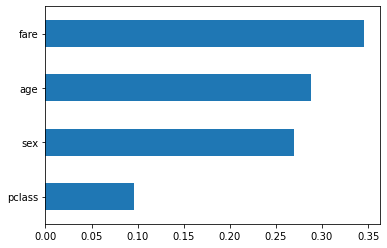

In [28]:
model_ranks=pd.Series(h.feature_importances_,index=x_train.columns,name="Importance").sort_values(ascending=True,inplace=False) 
ax=model_ranks.plot(kind='barh')

We then present a bar graph of which independent variables are the most and least important to the survival of the passengers. It is once again, the class that the passenger stayed in that is shown to be the least important. Fare, just like before is first, followed by age and sex.

Now we run the model, but this time we increase the number of estimators to 100, in hope of increasing the accuracy score.

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
h = RandomForestClassifier(n_estimators = 100, random_state = 5)
y_train = y_train.values.ravel()
h.fit(x_train,y_train)
y_pred = h.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7961783439490446

On the last dataset, using 100 estimators caused the accuracy score to increase by 0.02. However, here it actually causes a decrease in the accuracy score with the score being about 0.01 less than before. We conclude that 10 estimators is the diminish of returns as not only did the model get less accurate, it also took more runtime. Because of this, we will use n=10 as our estimator amount for the rest of the analysis on this titanic2 dataset.

Since 'pclass' was shown to be the least important variable in the visualization, we run a model without it in an attempt to see if removing it causes an increase in the accuracy score.

In [30]:
x = titanic2[['sex', 'age', 'fare']]
y = titanic2[['survived']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
h = RandomForestClassifier(n_estimators = 10, random_state = 5)
y_train = y_train.values.ravel()
h.fit(x_train,y_train)
y_pred = h.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7770700636942676

However, just like before, the accuracy score decreases to 0.78, which was even lower than when we used 100 estimators. This is most likely due to having less data to correlate with. However, it is much higher than the accuracy score of the first dataset's model that didn't contain the class the passenger stayed in.


In [31]:
x = titanic2[['pclass','sex', 'age', 'fare']]
y = titanic2[['survived']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
h = RandomForestClassifier(n_estimators = 10, random_state = 5)
y_train = y_train.values.ravel()
h.fit(x_train,y_train)
y_pred = h.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.802547770700637

Above is once again the first model we created for the titanic2 dataset which used 10 estimators. This has been found to be the best model to use for the titanic2 dataset as it has less estimators AND better accuracy.

Out of curiosity, we re-run the model with 100 estimators and see if the predictions are any different from before.

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
h = RandomForestClassifier(n_estimators = 100, random_state = 5)
y_train = y_train.values.ravel()
h.fit(x_train,y_train)
y_pred = h.predict(x_test)

In [33]:
obs = [[1.0, 0.0, 14.0, 300.0]]
h.predict(obs) 

/Users/adamabid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [34]:
obs = [[2.0, 1.0, 37.0, 28.0]]
h.predict(obs)

/Users/adamabid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0.])

The less accurate and less efficient model with 100 estimators still predicts the exact outcomes as the one with 10 estimators; they both say that a 14 yr old female passenger who had paid 300 USD for their fare and was cabin class 1 would have survived. Both also predict that a 37 yr old male passenger who had paid 28 USD for their fare and was cabin class 2 would not survive.

## <mark> Conclusion </mark>

_<br>Overall our model seemed to be around 75 to 80 percent accurate, which is a respectable amount. We found that in both datasets, the biggest factor for passengers surviving was how much a passenger paid for their ticket. Obviously, a more expensive ticket led to a better cabin on the ship, but to our surprise, the passenger class was actually the least important variable of the four we used in the model. This could be for a number of reasons, first of which being that those who spent more on a ticket were likely more wealthy and possibly had more experience travelling on a boat, thus possibly having more survival skills as well. The passenger class not mattering could be attested to the fact that the Titanic hit the iceberg at approximately 11:40 pm. A lot of passengers could have been awake still and wandering around the ship, especially after the sinking began, so it is very likely the many passengers were not in their respective cabins.<br><br>Using two different datasets further validated the accuracy of the model, as they both returned the same results from the predictions, with the second dataset having more accurate results, likely due to it being a larger dataset. The first dataset's best model used 100 estimators, while only 10 were used for the second dataset's best model.<br><br>The Titanic was a crazy catastrophe that unfortunately killed countless lives, but analyzing the data of its passengers and which ones survived can help us predict who is most prone to danger if another disaster like this was to ever happen again.